In [1]:
# utils
import json
import os

def get_class_idx(label):
    # path to ImageNet class label mapping file
    label_path = 'imagenet_class_index.json'
    
    # open imagenet class mapping file and load mappings as a directory with 
    # human-readable class label as the key and integer index as value
    with open(label_path) as f:
        image_net_classes = {labels[1]: int(idx) for (idx, labels) in 
                            json.load(f).items()}
        
    # check to see if input class label has a corresponding integer index
    # value, and if so return it otherwise return a Non-type value
    return image_net_classes.get(label, None)

[INFO] loading image...
[INFO] loading pre-trained ResNet50 model...
[INFO] making predictions...
[INFO] hog => 341
[INFO] 1.hog: 99.97%
[INFO] 2.wild_boar: 0.03%
[INFO] 3.piggy_bank: 0.00%


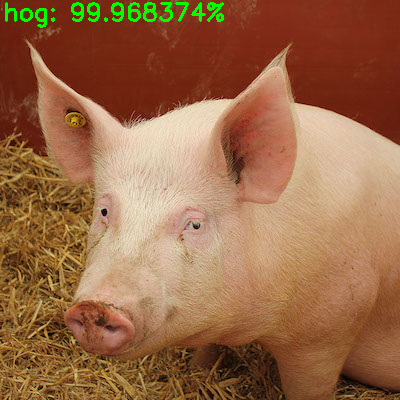

In [5]:
# predicting normal
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import imutils

def preprocess_image(image):
    # swap color channels, preprocess image, and add in batch dimension
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = preprocess_input(image)
    image = cv.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    
    return image

# image path
image_path = 'pig.jpg'

# load image from disk and make clone for annotation
print('[INFO] loading image...')
image = cv.imread(image_path)
output = image.copy()

# preprocess input image
output = imutils.resize(output, width=400)
preprocessed_image=preprocess_image(image)

# load the pre-trained ResNet50 model
print('[INFO] loading pre-trained ResNet50 model...')
model = ResNet50(weights='imagenet')

# make predictions on input image and parse the top-3 predictions
print('[INFO] making predictions...')
predictions = model.predict(preprocessed_image)
predictions = decode_predictions(predictions, top=3)[0]

# loop over the top 3 predictions
for (i, (imagenet_id, label, prob)) in enumerate(predictions):
    # print imagenet class label ID of top prediction to our terminal (we will
    # need this label for script actually performing adverserial attack)
    if i==0:
        print(f'[INFO] {label} => {get_class_idx(label)}')
        
    # display prediction to our screen
    print(f'[INFO] {i+1}.{label}: {prob*100:.2f}%')
    
# draw the top most predicted label on image along with confidence score
text = f'{predictions[0][1]}: {predictions[0][2]*100:2f}%'
cv.putText(output, text, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show image
cv2_imshow(output)
#cv.waitKey(0)
#cv.destroyAllWindows()